# Input

In [1]:
import numpy as np
import MDAnalysis as mda

import matplotlib.pyplot as plt
%matplotlib inline

import re

import pandas as pd
import calvados as cal
from calvados import slab_conc

In [2]:
records = cal.sequence.read_fasta('ects.fasta')
names = []
for name,rec in records.items():
    names.append(name)

names.remove('FUS') # comment out for positive control
# Alternatively, define names = [...] for subset of protein IDRs
print(names) # Note: Names of Gbi DFF1/Gbi DFF2 are switched with respect to manuscript, as are Cri DFD1/Cri DFD2 
clean_names = names

temp = 293
aminoacids = "FYWHRKDEQNSTVILMAGPC"
residues = pd.read_csv('calvados/data/residues.csv').set_index('one')

fbase = '../slab'

plt.rcParams['font.size'] = 14
plt.rcParams['errorbar.capsize'] = 5

['ECT1N', 'ECT2N', 'ECT3N', 'ECT4N', 'ECT5N', 'ECT6N', 'ECT7N', 'ECT8N', 'ECT9N', 'ECT10N', 'ECT11N', 'YTHDF_dro', 'YTHDF2_hu', 'Mpo_YTHDF', 'Cri_DFAB', 'Cri_DFD1', 'Cri_DFD2', 'Cri_DFF1', 'Cri_DFF2', 'Cri_DFF3', 'Gb_DFA1', 'Gb_DFA2', 'Gb_DFB', 'Gb_DFC1', 'Gb_DFC2', 'Gb_DFD', 'Gb_DFF1', 'Gb_DFF2', 'Sm_YTHDF', 'Cp_YTHDF', 'Atr_DFA', 'Atr_DFB', 'Atr_DFC1', 'Atr_DFC2', 'Atr_DFD', 'Ita_DFE1', 'Ita_DFE2', 'Ita_DFE3']


# Slab sims

In [3]:
vv = pd.DataFrame(index=names,dtype=object)
ee = vv.copy()
dGs = {}
Lxys = {} # in Angstrom

## Lxys

In [4]:
# xy dimension of slab

for name in names:
    path = f'{fbase}/{name}/{temp:d}'
    u = mda.Universe(f'{path}/top.pdb')
    if ('ECT2N' in name) and ('ECT2N_k' not in name):
        Lxys[name] = u.dimensions[0] / 10. # correct for some inconsistent early top.pdb
    else:
        Lxys[name] = u.dimensions[0]
    print(name, Lxys[name], u.dimensions)

ECT1N 170.0 [ 170.  170. 3000.   90.   90.   90.]
ECT2N 250.0 [ 2500.  2500. 30000.    90.    90.    90.]
ECT3N 170.0 [ 170.  170. 3000.   90.   90.   90.]
ECT4N 250.0 [ 250.  250. 3000.   90.   90.   90.]
ECT5N 250.0 [ 250.  250. 3000.   90.   90.   90.]
ECT6N 170.0 [ 170.  170. 3000.   90.   90.   90.]
ECT7N 170.0 [ 170.  170. 3000.   90.   90.   90.]
ECT8N 170.0 [ 170.  170. 3000.   90.   90.   90.]
ECT9N 170.0 [ 170.  170. 3000.   90.   90.   90.]
ECT10N 170.0 [ 170.  170. 3000.   90.   90.   90.]
ECT11N 170.0 [ 170.  170. 3000.   90.   90.   90.]
YTHDF_dro 250.0 [ 250.  250. 3000.   90.   90.   90.]
YTHDF2_hu 250.0 [ 250.  250. 3000.   90.   90.   90.]
Mpo_YTHDF 250.0 [ 250.  250. 3000.   90.   90.   90.]
Cri_DFAB 250.0 [ 250.  250. 3000.   90.   90.   90.]
Cri_DFD1 250.0 [ 250.  250. 3000.   90.   90.   90.]
Cri_DFD2 250.0 [ 250.  250. 3000.   90.   90.   90.]
Cri_DFF1 250.0 [ 250.  250. 3000.   90.   90.   90.]
Cri_DFF2 250.0 [ 250.  250. 3000.   90.   90.   90.]
Cri_DFF3 250.0 

## Timestraces

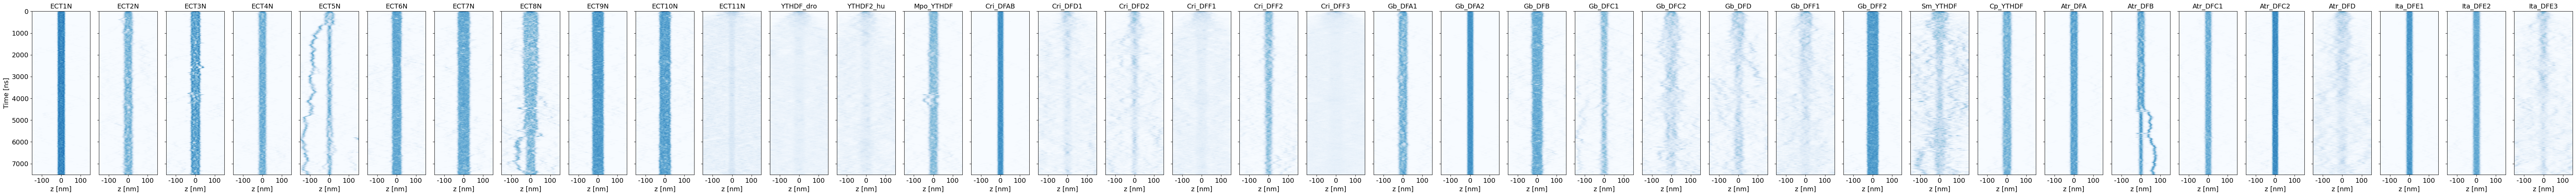

In [5]:
plt.rcParams['font.size'] = 14

temp = 293

tmin = 2000
tmax = 7500

fig, ax = plt.subplots(1,len(names),figsize=(2*len(names),6),sharey=True)

for idx,name in enumerate(names):
    cmap = plt.cm.Blues
    clean_name = clean_names[idx]
       
    axij = ax[idx]
    ax[0].set(ylabel='Time [ns]')

    seq = records[name].seq
                       
    N = len(seq)
    mw = cal.sequence.calc_mw(seq) # Da
    hs = np.load(f'{fbase}/{name}/{temp:d}/{name}_{temp:d}.npy')
    
    L = Lxys[name] / 10. # in nm
    
    hconv_mM, hconv_mgml = cal.analysis.convert_h(hs,N,L,mw) # x mys
    
    axij.imshow(hconv_mgml[0:tmax,::10],cmap=cmap,vmin=0,vmax=600,
               aspect='auto')
    
    axij.set_title(clean_name,fontsize=14)#,rotation=90)

    if L in [17., 25.]:
        xticks = [50,150,250]
        xticklabels = [-100,0,100]
    else:
        xticks = [25,75,125]
        xticklabels = [-50,0,50]

    axij.set_xticks(xticks)
    axij.set_xticklabels(xticklabels)
    axij.set(xlabel=r'z [nm]')

fig.tight_layout()
# fig.savefig(f'{fbase}/slab_timetraces.pdf')

## Concentration profiles

ECT1N
ECT2N
ECT3N
ECT4N
ECT5N
ECT6N
ECT7N
ECT8N
ECT9N
ECT10N
ECT11N
YTHDF_dro
YTHDF2_hu
Mpo_YTHDF
Cri_DFAB
Cri_DFD1
Cri_DFD2
Cri_DFF1
Cri_DFF2
Cri_DFF3
Gb_DFA1
Gb_DFA2
Gb_DFB
Gb_DFC1
Gb_DFC2
Gb_DFD
Gb_DFF1
Gb_DFF2
Sm_YTHDF
Cp_YTHDF
Atr_DFA
Atr_DFB
Atr_DFC1
Atr_DFC2
Atr_DFD
Ita_DFE1
Ita_DFE2
Ita_DFE3
---------
csat
            293_dil    293_den
ECT1N      0.037172  14.467663
ECT2N      0.094215   5.219376
ECT3N      0.113961  10.577664
ECT4N      0.052583   6.259299
ECT5N      0.576344   5.196561
ECT6N      0.212633  10.379766
ECT7N      0.124394   8.442798
ECT8N      0.305118   6.656993
ECT9N      0.089932   9.068461
ECT10N     0.120733   8.959529
ECT11N     1.768809   3.416574
YTHDF_dro  0.827030   1.233240
YTHDF2_hu  0.795229   1.435665
Mpo_YTHDF  0.101182   4.811227
Cri_DFAB   0.024024   8.106384
Cri_DFD1   0.791230   1.880654
Cri_DFD2   0.688942   2.894785
Cri_DFF1   0.815063   1.329367
Cri_DFF2   0.289931   5.082099
Cri_DFF3   0.820665   1.088926
Gb_DFA1    0.063391   5.212896
Gb

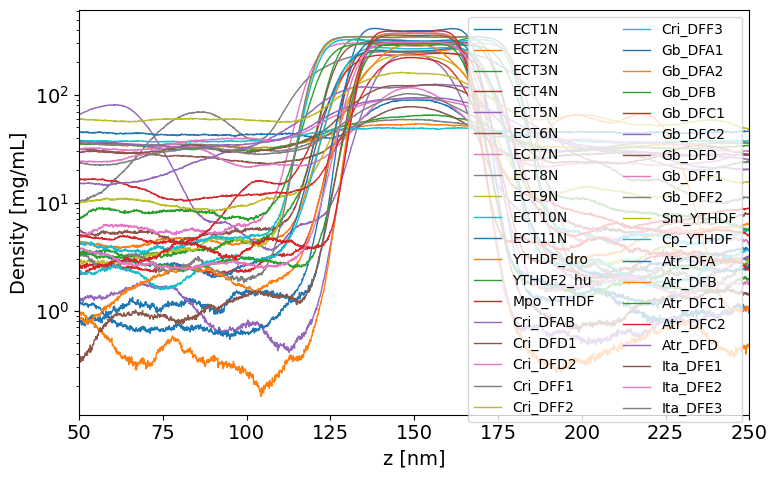

In [6]:
temp = 293

fig, ax = plt.subplots(figsize=(8,5))#,sharey=True)

xlim = (50,250)

for idx, name in enumerate(names):
    clean_name = clean_names[idx]
    color = None
    alpha = 1.

    print(clean_name)
    axij = ax
    L = Lxys[name] / 10. # nm
    seq = records[name].seq
    N = len(seq)

    mw = cal.sequence.calc_mw(seq) # Da
    # print(mw)
    # print(f'L={L}, n(AA)={N}')

    hs = np.load(f'{fbase}/{name}/{temp:d}/{name}_{temp:d}.npy')

    hconv_mM, hconv_mgml = cal.analysis.convert_h(hs,N,L,mw)

    # print(hs.shape)
    # print(f'total protein conc [mM]: {np.mean(hconv_mM):.2f}')
    # print(f'total AA conc [mM]: {np.mean(hconv_mM)*N:.2f}')

    xs = np.arange(0,hs[0].shape[0]/10.,0.1)

    ls = 'solid'

    axij.plot(xs,np.mean(hconv_mgml[tmin:tmax],axis=0),
              label=clean_name,lw=1.0,c=color,ls=ls,alpha=alpha)

    pden = 0.5

    if name == 'Gb_DFC2':
        pdil = 4
    elif name == 'Gb_DFF1':
        pdil = 4
    else:
        pdil = 6
    vv, ee = cal.slab_conc.calcProfile(seq,name,temp,L,vv,ee,fbase=fbase,tmin=tmin,tmax=tmax,plot=False,pdil=pdil,pden=pden)

print('---------')
print('csat')
print(vv)
print('---------')
print('errors')
print(ee)

axij = ax    
axij.set(xlim=xlim)
axij.set(yscale='log')
axij.set(xlabel='z [nm]',ylabel='Density [mg/mL]')
axij.legend(loc=1,fontsize=10,ncol=2)
fig.tight_layout()

## csat

ECT1N
ECT2N
ECT3N
ECT4N
ECT5N
ECT6N
ECT7N
ECT8N
ECT9N
ECT10N
ECT11N
YTHDF_dro
YTHDF2_hu
Mpo_YTHDF
Cri_DFAB
Cri_DFD1
Cri_DFD2
Cri_DFF1
Cri_DFF2
Cri_DFF3
Gb_DFA1
Gb_DFA2
Gb_DFB
Gb_DFC1
Gb_DFC2
Gb_DFD
Gb_DFF1
Gb_DFF2
Sm_YTHDF
Cp_YTHDF
Atr_DFA
Atr_DFB
Atr_DFC1
Atr_DFC2
Atr_DFD
Ita_DFE1
Ita_DFE2
Ita_DFE3


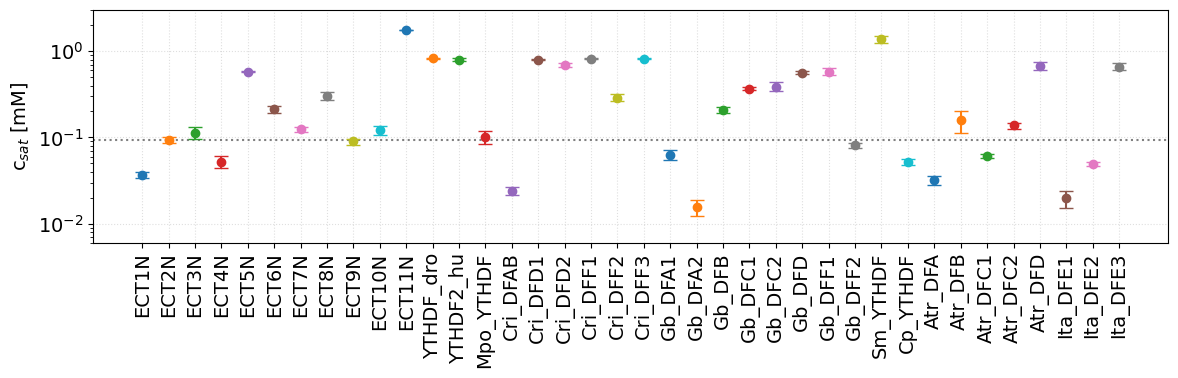

In [7]:
T = 293.

fig, ax = plt.subplots(figsize=(12,4))#,sharey=True)

for idx,name in enumerate(names):
    print(name)
    
    seq = records[name].seq
    N = len(seq)
    
    c_dil = vv.loc[name][f'{temp}_dil']   
    e_dil = ee.loc[name][f'{temp}_dil']
    
    if name == 'ECT2N':
        ax.axhline(c_dil,c='gray',ls='dotted')

    alpha = 1.
    ax.errorbar(idx,c_dil,yerr=e_dil,marker='o',capsize=5,alpha=alpha)#,c=colors[idx])
    ax.set_xticks(np.arange(len(clean_names)))
    ax.set_xticklabels(clean_names,rotation=90)
ax.set_yscale('log')
ax.set(ylabel=r'c$_{sat}$ [mM]')
ax.set(ylim=(6e-3,3))

ax.grid(ls='dotted',alpha=0.4)

fig.tight_layout()
# fig.savefig('figures/csat_all.pdf')

## dG

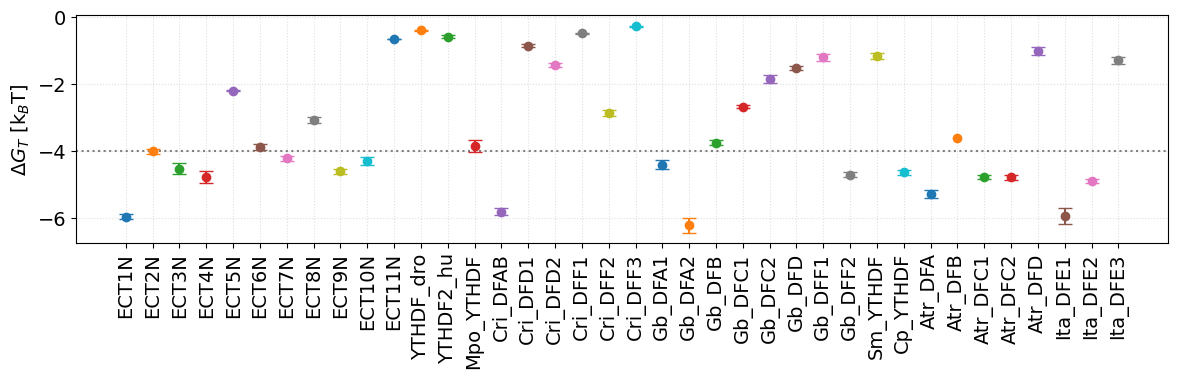

In [8]:
T = 293.

fig, ax = plt.subplots(figsize=(12,4))#,sharey=True)

for idx,name in enumerate(names):
    seq = records[name].seq
    
    N = len(seq)
    
    c_dil = vv.loc[name][f'{temp}_dil']
    c_den = vv.loc[name][f'{temp}_den']
    
    e_dil = ee.loc[name][f'{temp}_dil']
    e_den = ee.loc[name][f'{temp}_den']
    
    dG, dG_error = cal.analysis.calc_dG(c_dil,e_dil,c_den,e_den)
    dGs[name] = dG
    
    if name == 'ECT2N':
        ax.axhline(dG,c='gray',ls='dotted')
    
    ax.errorbar(idx,dG,yerr=dG_error,marker='o',capsize=5,alpha=alpha)
    ax.set_xticks(np.arange(len(vv[f'{temp}_dil'])))
    ax.grid(ls='dotted',alpha=0.4)
    ax.set_xticklabels(clean_names,rotation=90)

ax.set(ylabel='$\Delta G_T$ [k$_B$T]')

fig.tight_layout()
# fig.savefig('figures/dGs_all.pdf')

# Sequence features

## AA distribution

0 ECT1N
1 ECT2N
2 ECT3N
3 ECT4N
4 ECT5N
5 ECT6N
6 ECT7N
7 ECT8N
8 ECT9N
9 ECT10N
10 ECT11N
11 YTHDF_dro
12 YTHDF2_hu
13 Mpo_YTHDF
14 Cri_DFAB
15 Cri_DFD1
16 Cri_DFD2
17 Cri_DFF1
18 Cri_DFF2
19 Cri_DFF3
20 Gb_DFA1
21 Gb_DFA2
22 Gb_DFB
23 Gb_DFC1
24 Gb_DFC2
25 Gb_DFD
26 Gb_DFF1
27 Gb_DFF2
28 Sm_YTHDF
29 Cp_YTHDF
30 Atr_DFA
31 Atr_DFB
32 Atr_DFC1
33 Atr_DFC2
34 Atr_DFD
35 Ita_DFE1
36 Ita_DFE2
37 Ita_DFE3


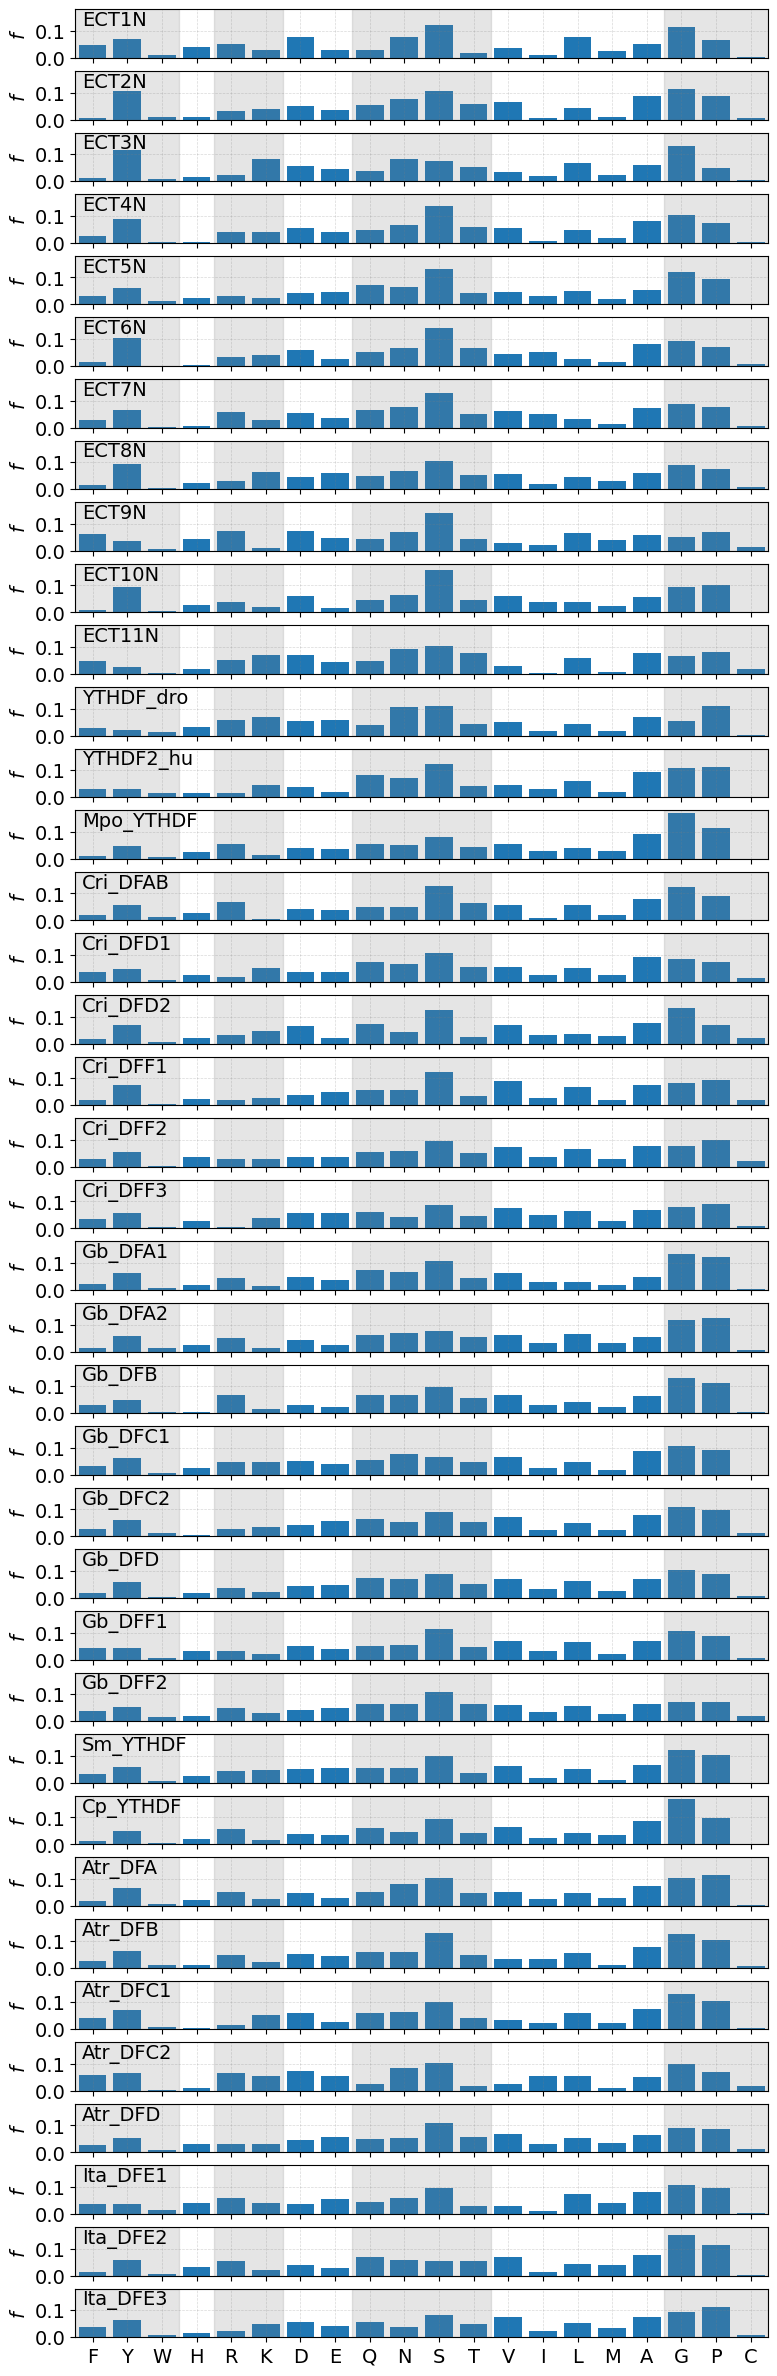

In [9]:
fig, ax = plt.subplots(len(names),1,figsize=(8,24),sharex=True,sharey=True)

ct = 0
for idx, name in enumerate(names):
    print(ct,name)
    if name in ['FUS','A1','MRB1']:
        # ct += 1
        continue
    clean_name = name
    # clean_name = clean_names_ects[idx]
    f = "".join(records[name].seq)
    # print(f[del2[0]:del2[1]])
    axij = ax[ct]
    aa_dist = np.zeros((len(aminoacids)))
    for aa in f: # convert 1-based to 0-based
        res = re.search(aa,aminoacids).start()
        if res != None:
            aa_dist[res] += 1
    aa_dist /= np.sum(aa_dist)
    
    axij.bar(np.arange(len(aminoacids)),aa_dist)#,width)

    axij.set(xlim=(-0.5,len(aminoacids)-0.5),ylim=(0,0.18))
    axij.set(ylabel='$f$')
    axij.text(-0.3,0.12,clean_name)
    for i in range(len(aminoacids)):
        axij.axvline(i,color='gray',ls='dashed',lw=0.5,alpha=0.3)
    ranges = [(0,2),(4,5),(8,11),(17,19)]
    width=0.5
    for r in ranges:
        axij.axvspan(r[0]-width,r[1]+width,color='gray',alpha=0.2)
    axij.set_yticks(np.arange(0,0.15,0.1))
    axij.axhline(0.1,color='gray',ls='dashed',lw=0.5,alpha=0.3)
    ct += 1
    # axij.axvspan(-0.4,2.4,color='gray',alpha=0.3)
ax[-1].set(xticks=np.arange(len(aminoacids)))
ax[-1].set(xticklabels=aminoacids)
fig.tight_layout(h_pad=0.)

## Charges along seq

ECT1N 244
ECT2N 440
ECT3N 260
ECT4N 413
ECT5N 397
ECT6N 269
ECT7N 320
ECT8N 320
ECT9N 329
ECT10N 324
ECT11N 230
YTHDF_dro 381
YTHDF2_hu 409
Mpo_YTHDF 460
Cri_DFAB 413
Cri_DFD1 358
Cri_DFD2 356
Cri_DFF1 395
Cri_DFF2 395
Cri_DFF3 408
Gb_DFA1 451
Gb_DFA2 420
Gb_DFB 303
Gb_DFC1 353
Gb_DFC2 443
Gb_DFD 421
Gb_DFF1 443
Gb_DFF2 335
Sm_YTHDF 325
Cp_YTHDF 472
Atr_DFA 448
Atr_DFB 426
Atr_DFC1 368
Atr_DFC2 202
Atr_DFD 440
Ita_DFE1 413
Ita_DFE2 413
Ita_DFE3 373


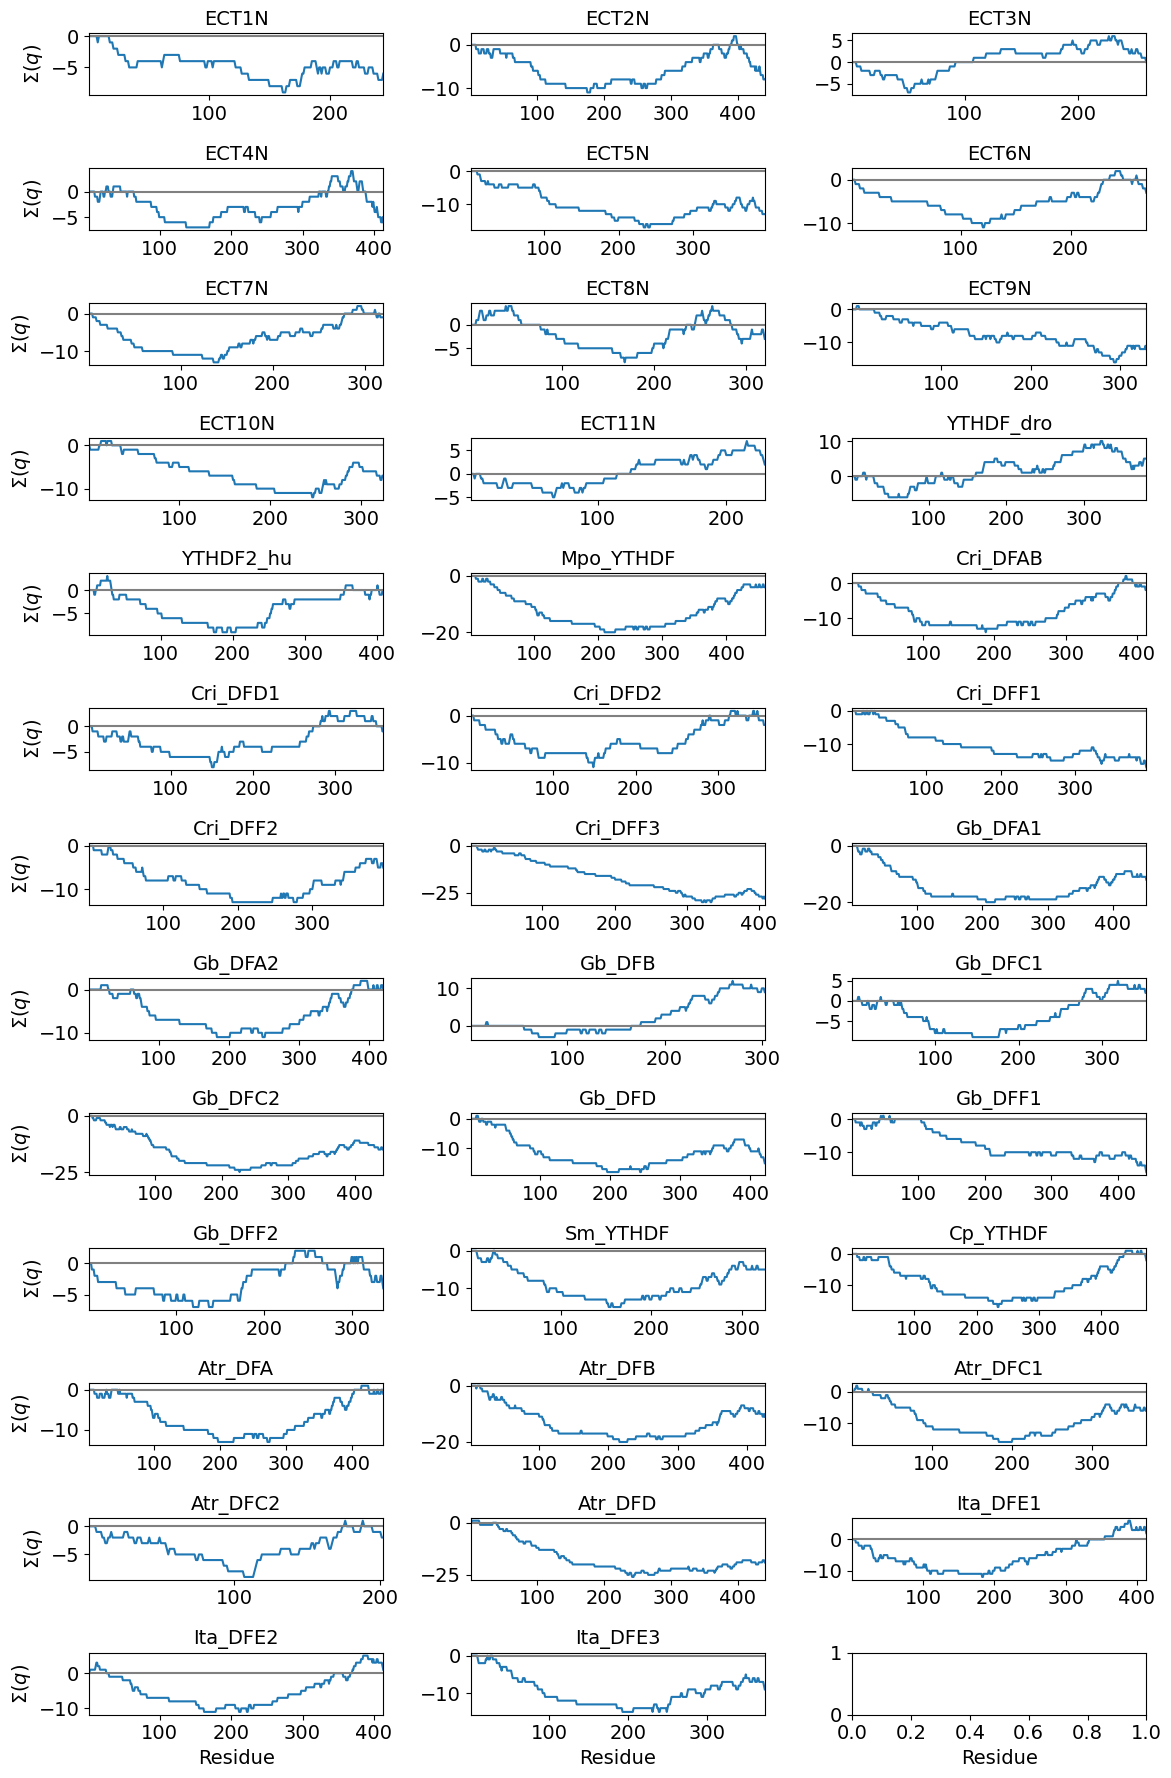

In [10]:
fig, ax = plt.subplots(13,3,figsize=(12,18))#,sharey=True)

for idx,name in enumerate(names):
    prot = records[name]
    seq = prot.seq
    print(name, len(seq))
    qs, qs_abs = cal.sequence.get_qs(seq)
    
    i = idx // 3
    j = idx % 3
    
    axij = ax[i,j]
    xs = np.arange(1,len(qs)+1)
    axij.plot(xs,np.cumsum(qs),lw=1.5)
    xmax = len(qs)+1
    xmin = 1
    axij.set(xlim=(np.min(xs),np.max(xs)))
    if len(qs) > 200:
        step = 100
    else:
        step = 50
    axij.set_xticks(np.arange(step,np.max(xs)+1,step))

    ax[i,0].set(ylabel=r'$\Sigma(q)$')
    axij.set_title(clean_names[idx],fontsize=14)
    axij.axhline(0,c='gray')
for jdx in range(3):
    ax[-1,jdx].set(xlabel='Residue')
fig.tight_layout()
# fig.savefig(f'slab/plant_idrs/q_along_seq.pdf')

## Lambda vs dG (2D plot)

In [11]:
cladedict = {
    'A' : ['Aa_DFA2', 'Aa_DFA1', 'Nc_DFA', 'Atr_DFA', 'Gb_DFA2', 'Gb_DFA1'],
    'B' : ['Gb_DFB', 'Atr_DFB', 'Nc_DFB', 'Aa_DFB', 'Cri_DFAB'],
    'C' : ['Aa_DFC3', 'Atr_DFC2', 'Nc_DFC2', 'Aa_DFC2', 'Aa_DFC1', 'Nc_DFC1', 'Atr_DFC1', 'Gb_DFC1', 'Gb_DFC2'],
    'D' : ['Cri_DFD2', 'Cri_DFD1', 'Gb_DFD', 'Atr_DFD', 'Nc_DFD', 'Aa_DFD'],
    'E' : ['Mpo_YTHDF', 'Cp_YTHDF', 'Pp_YTHDF1', 'Pp_YTHDF2', 'Sm_YTHDF',
          'Ita_DFE1', 'Ita_DFE2', 'Ita_DFE3'],
    'F' : ['Gb_DFF1', 'Gb_DFF2', 'Cri_DFF3', 'Cri_DFF2', 'Cri_DFF1']
}

clade_to_color = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
}

df = pd.read_csv('Dicot_IDRs.csv',sep=';',header=0)
df = df[~df['Name_FloTel'].str.contains('Atr')]
df = df.set_index('Name_FloTel')

name_to_color = {}
name_to_clade = {}

colors = [
    [154/255,153/255,41/255],
    [102/255,110/255,36/255],
    [167/255,31/255,148/255],
    [225/255,0,20/255],
    [127/255,54/255,48/255],
    [255/255,121/255,0]
]

In [12]:
for name in names:
    clade = None
    if name[:3] == 'ECT':
        name_in_df = name[:-1]
    else:
        name_in_df = name

    if name_in_df in df.index:
        clade = df.loc[name_in_df,'CLADE'][0]
        color = colors[clade_to_color[clade]]
    else:
        for cl, clitem in cladedict.items():
            if name_in_df in clitem:
                clade = cl
                color = colors[clade_to_color[clade]]
                break
    if clade == None:
        color = 'black'

    name_to_clade[name] = clade
    name_to_color[name] = color

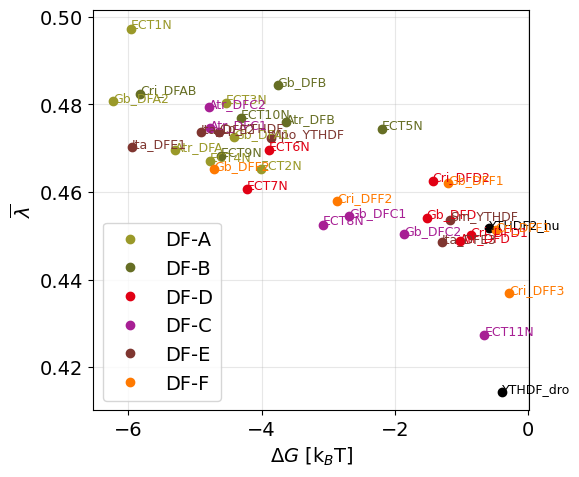

In [13]:
fig, ax = plt.subplots(figsize=(6,5))
clade_label = [1 for _ in range(6)]

for idx, name in enumerate(names):
    color = name_to_color[name]
    clade = name_to_clade[name]
    if clade != None:
        clidx = clade_to_color[clade]
    if name in ['A1','FUS']:
        continue
    seq = records[name].seq
    N = len(seq)

    lambdas_mean = cal.sequence.mean_lambda(seq,residues)

    offset = 0.002
    
    for jdx,feature in enumerate([lambdas_mean]):
        axij = ax
        if np.isnan(dGs[name]): # unconverged --> 0
            dG = 0.
            marker = 'x'
            continue
        else:
            dG = dGs[name]
            marker = 'o'
        if clade == None:
            axij.plot(dG,feature,marker,color=color)
        else:
            if clade_label[clidx] == 1:
                axij.plot(dG,feature,marker,color=color,label=f'DF-{clade}')
                clade_label[clidx] = 0
            else:
                axij.plot(dG,feature,marker,color=color)
        axij.text(dG,feature,clean_names[idx],fontsize=9,color=color)
        
for jdx, lab in enumerate([r'$\overline{\lambda}$']):
    axij = ax
    axij.set(xlabel=r'$\Delta G$ [k$_B$T]')
    axij.set(ylabel=lab)
    axij.grid(True,alpha=0.3)

ax.legend()
ax.set(xticks=(np.arange(-6,0.1,2)))
fig.tight_layout()
# fig.savefig('figures/simulation_2Dplots.pdf')